# Les modèles de ségrégation 

Projet d'informatique réalisé par Victor Huynh et Solène Blasco Lopez.


# Introduction

# I. Ségrégation sociale - le modèle de Schelling

# II. Ségrégation spatiale - le modèle de Grauwin et Jensen

En 2009, Grauwin et Jensen ont repris et adapté le modèle de ségrégation de Schelling pour étudier la ségrégation spatiale, et les répercussions d’actions à l’échelle microscopique sur l’échelle macroscopique. Cette fois, ils ne considèrent qu’un seul type d’individu dans une ville divisée en quartiers, et étudient leur répartition en introduisant quelques agents altruistes qui cherchent à optimiser l’équilibre agrégé.


> Les programmes réalisés dans cette section pourront être trouvé dans le dossier `Grauwin`.

## 1.   Implémentation du modèle

### a) Définition des paramètres

Dans le modèle de Grauwin et Jensen, on considère une ville représentée par une grille carrée, divisée en $Q=q^2$ quartiers contenant chacun $H=h^2$ emplacements. La taille de la ville est donc $l=h*q$. 

On y place initialement, et de manière aléatoire, $N$ agents (ou ménages), de sorte que la densité de la ville soit $ρ_0=\frac{1}{2}$. On a ainsi $N=\frac{HQ}{2}$ habitants. Parmi eux, on note $α$ la fraction des individus qui sont dits "altruistes", c'est-à-dire qui vont agir pour le bien commun et non dans leur propre intérêt. On a $0≤α≤1$.

De plus, on caractérise chaque individu par une fonction d'utilité $u$ dépendant de la densité $ρ$ du quartier dans lequel il vit, et par un paramètre de "bruit" $\frac{1}{T}$. Ce dernier représente l'ancrage des individus dans leur quartier, des contraintes au déménagement qui n'entrent pas ici en compte dans le calcul de l'utilité (par exemple la proximité de leurs amis et de leur travail). Ainsi, quand $T→∞$, le choix des individus est "irrationnel", c'est-à-dire qu'ils sont indifférents entre déménager ou non. Au contraire, si $T→0$, le choix est "rationnel", et les individus démégent uniquement si cela maximise leur utilité.

Le modèle de Grauwin et Jensen considère les individus pleinement satisfaits lorsqu'ils habitent dans un quartier de densité $ρ=\frac{1}{2}$. Cette intuition est due au fait que vivre dans un quartier saturé est contraignant (embouteillages, …), et que vivre dans un quartier trop vide l'est aussi (pas assez de vie, d'infrastructures, ...). On choisit donc, pour simplifier, une fonction d'utilité individuelle linéaire par morceaux, telle que l'utilité soit maximale (égale à 1) si $ρ = \frac{1}{2}$ : 

$$\ u(ρ) = \left\{
    \begin{array}{ll}
        2ρ & \mbox{si } ρ ≤ \frac{1}{2} \\
        2(m-1)ρ+(2-m) & \mbox{sinon}
    \end{array}
\right.$$

où $m$ est un paramètre d'asymétrie, qui attribue l'utilité $0≤m≤1$ à la densité $ρ = 1$, partant du principe qu'un quartier surpeuplé sera toujours préféré à un quartier très peu peuplé. 

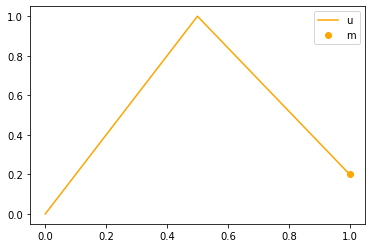

In [11]:
from matplotlib.pyplot import plot, show, legend

plot([0,0.5,1],[0,1,0.2],label='u', c='orange')
plot(1,0.2,'o', label='m', c='orange')
legend()
show()

Afin d'implémenter le modèle, on crée deux classes : l'une contenant les paramètres des simulations, et l'autres regroupant les caractéristiques d'une ville lors des simulations. Cette dernière représente une ville par une grille remplie de $0$ (emplacement vide), de $1$ (emplacement occupé par un individu égoïste) et de $2$ (emplacement occupé par un individu altruiste) représentant l'état de la ville, et d'une grille contenant la densité de chaque quartier, pour pouvoir y accéder rapidement. 

In [0]:
class Paramètres :
    """ Classe regroupant tous les paramètres d'une simulation """
    
    def __init__ (self,q,h,T,m,alpha = 0) :
        self.q = q  # définit le nombre de quartier Q = q²
        self.h = h  # définit le nombre d'emplacements par quartiers H = h²
        self.l = h*q  # taille de la ville 
        
        self.N = ((h*q)**2)//2  # Nombre d'agents initialement 
        self.T = T # Contrainte caractérisant l'ancrage des individus dans leur quartier
        self.alpha = alpha  # Coefficient intégrant l'altruisme
        
        self.u = lambda x : 2*x if x <= 1/2 else (2*(m-1)*x+2-m) # Fonction d'utilité des agents
        

class Ville :
    """Classe regroupant toutes les caractéristiques de la ville d'une simulation :
        - la ville, sous la forme d'une grille de taille l * l, contenant des 0 si l'emplacement est occupé, des 1 s'il est occupé
        - les densités de chaque quartier, sous la forme d'une grille q*q
    """
    
    def __init__ (self,ville,densites) :
        self.ville = ville
        self.densites = densites

On peut également définir la fonction d'utilité agrégée de la ville, définie de la manière suivante : 

$$ U(x) = \sum_{i=1}^{q} \sum_{j=1}^{q} n_{i,j} u(ρ_{i,j}) = H \sum_{i=1}^{q} \sum_{j=1}^{q} ρ_{i,j} u(ρ_{i,j}) $$

pour une configuration $x=(ρ_{i,j})_{0≤i≤q,0≤j≤q}=(\frac{n_{i,j}}{H})_{0≤i≤q,0≤j≤q}$ de la ville.

In [0]:
def U(ville,p) :
    s = 0
    for i in range(p.q) :
        for j in range(p.q) :
            rho = ville.densites[i,j]
            s+= rho * p.u(rho)
    H = (p.h)**2
    return s * H

> Les classes et l'utilité agrégée sont regroupés dans le programme `classes.py`.



### b) Initialisation et principe d'itération du modèle

### c) Tests unitaires et calcul de complexité

## 2. Simulations et analyses 

# III. Comparaison et association des modèles 

# Conclusion